# Seminar 4. Text classification using CNN

Parameters of the task

In [48]:
# Task
max_words = 20
max_len = 40
num_classes = 2

# Training
epochs = 10
batch_size = 512
print_batch_n = 100

Let's download datasets

In [5]:
import pandas
#base_url = "https://github.com/madrugado/keras-tutorial/raw/master/data"
base_url = "."
df_train = pandas.read_csv(f"{base_url}/train.csv")
df_test = pandas.read_csv(f"{base_url}/test.csv")
df_val = pandas.read_csv(f"{base_url}/val.csv")

We can look at some examples from training set

In [6]:
df_train.head()

,id,text,class
0,0,@alisachachka не уезжаааааааай. :(❤ я тоже не ...,0
1,1,RT @GalyginVadim: Ребята и девчата!\nВсе в кин...,1
2,2,RT @ARTEM_KLYUSHIN: Кто ненавидит пробки ретви...,0
3,3,RT @epupybobv: Хочется котлету по-киевски. Зап...,1
4,4,@KarineKurganova @Yess__Boss босапопа есбоса н...,1


We can look at some examples from test set

In [34]:
df_test.head()

,id,text
0,204150,Тектоника и рельеф-самое ужасное в мире мучение(
1,204151,"Ходили запускать шар желаний, но у нас не полу..."
2,204152,"Хочу лето только ради того, что бы направить н..."
3,204153,RT @RonyLiss: @colf_ne блин((\nа я шипперила Ф...
4,204154,"RT @anna_romt: @ZADROT_PO_IGRAM блин,каждое во..."


Add validate dataset

In [36]:
df_val.head()

,id,text,class
0,181467,RT @TukvaSociopat: Максимальный репост! ))) #є...,1
1,181468,чтоб у меня з.п. ежегодно индексировали на инд...,0
2,181469,@chilyandlime нехуя мне не хорошо !!! :((((,0
3,181470,"@inafish нее , когда ногами ахахах когда?ахаха...",0
4,181471,"Хочу сделать как лучше, а получаю как всегда. :(",0


## Preprocessing

Let's create a corpus of the text

In [8]:
train_corpus = " ".join(df_train["text"])
train_corpus = train_corpus.lower()

and find all tokents

In [9]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download("punkt")

tokens = word_tokenize(train_corpus)

[nltk_data] Downloading package punkt to /home/ck/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Now filter ofnly numbers and words

In [10]:
tokens_filtered = [word for word in tokens if word.isalnum()]

Collect top N words in the corpus

In [11]:
from nltk.probability import FreqDist
dist = FreqDist(tokens_filtered)
tokens_filtered_top = [pair[0] for pair in dist.most_common(max_words-1)]

Let's looks at them

In [12]:
tokens_filtered_top

['не',
 'я',
 'и',
 'в',
 'rt',
 'на',
 'а',
 'что',
 'http',
 'с',
 'у',
 'как',
 'меня',
 'это',
 'так',
 'мне',
 'все',
 'd',
 'но']

Now we are building vocabulary to encode every token using index

In [13]:
vocabulary = {v: k for k, v in dict(enumerate(tokens_filtered_top, 1)).items()}

In [14]:
import numpy as np
def text_to_sequence(text, maxlen):
    result = []
    tokens = word_tokenize(text.lower())
    tokens_filtered = [word for word in tokens if word.isalnum()]
    for word in tokens_filtered:
        if word in vocabulary:
            result.append(vocabulary[word])
    padding = [0]*(maxlen-len(result))
    return padding + result[-maxlen:]

In [15]:
x_train = np.array([text_to_sequence(text, max_len) for text in df_train["text"]], dtype=np.int32)
x_test = np.array([text_to_sequence(text, max_len) for text in df_test["text"]], dtype=np.int32)
x_val = np.array([text_to_sequence(text, max_len) for text in df_val["text"]], dtype=np.int32)

In [16]:
x_train.shape

(181467, 40)

In [17]:
x_train[:10]

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  1,  2,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  5,  3, 17,  4, 14,  3],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  5,  5],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  5],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  1,  3],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
   

In [18]:
x_train.shape

(181467, 40)

Let's prepare class labels

In [37]:
y_train = np.array(df_train["class"])
y_val = np.array(df_val["class"])

In [38]:
y_train[:10]

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 1])

In [39]:
y_train.shape

(181467,)

## Network

In [40]:
import random
import torch
import torch.nn as nn


seed = 0

random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True


In [41]:
class Net(nn.Module):
    def __init__(self, vocab_size=20, embedding_dim = 128, out_channel = 128, num_classes = num_classes):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.conv = nn.Conv1d(embedding_dim, out_channel, kernel_size=3)
        self.relu = nn.ReLU()
        self.linear = nn.Linear(out_channel, num_classes)
        
    def forward(self, x):        
        output = self.embedding(x)
        #                       B  F  L         
        output = output.permute(0, 2, 1)
        output = self.conv(output)
        output = self.relu(output)
        output = torch.max(output, axis=2).values
        output = self.linear(output)
        
        return output

## Training

In [42]:
from torch.utils.data import DataLoader, Dataset

class DataWrapper(Dataset):
    def __init__(self, data, target=None, transform=None):
        self.data = torch.from_numpy(data).long()
        if target is not None:
            self.target = torch.from_numpy(target).long()
        self.transform = transform
        
    def __getitem__(self, index):
        x = self.data[index]
        y = self.target[index] if self.target is not None else None
        
        if self.transform:
            x = self.transform(x)
            
        return x, y
    
    def __len__(self):
        return len(self.data)

In [49]:
model = Net(vocab_size=max_words)

print(model)
print("Parameters:", sum([param.nelement() for param in model.parameters()]))

model.train()
model = model.cuda()

optimizer = torch.optim.Adam(model.parameters(), lr=10e-3)
criterion = nn.CrossEntropyLoss()

    
train_dataset = DataWrapper(x_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

val_dataset = DataWrapper(x_val, y_val)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)

loss_history = []

for epoch in range(1,epochs+1):
    print(f"Train epoch {epoch}/{epochs}")
    for i, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        
        data = data.cuda()
        target = target.cuda()
        
        # compute output
        output = model(data)
        
        # compute gradient and do SGD step
        loss = criterion(output, target)
        loss.backward()
        
        optimizer.step()
        
        if i%print_batch_n == 0:
            loss = loss.float().item()
            print(f"Step {i}: {loss=}")
            loss_history.append(loss)

Net(
  (embedding): Embedding(20, 128)
  (conv): Conv1d(128, 128, kernel_size=(3,), stride=(1,))
  (relu): ReLU()
  (linear): Linear(in_features=128, out_features=2, bias=True)
)
Parameters: 52098
Train epoch 1/10
Step 0: loss=0.7232609391212463
Step 100: loss=0.626083493232727
Step 200: loss=0.6278808116912842
Step 300: loss=0.6299687027931213
Train epoch 2/10
Step 0: loss=0.645846962928772
Step 100: loss=0.6272290349006653
Step 200: loss=0.6264299750328064
Step 300: loss=0.6531081795692444
Train epoch 3/10
Step 0: loss=0.6071687936782837
Step 100: loss=0.6227794289588928
Step 200: loss=0.5933396220207214
Step 300: loss=0.6211014986038208
Train epoch 4/10
Step 0: loss=0.6328689455986023
Step 100: loss=0.6227603554725647
Step 200: loss=0.6174707412719727
Step 300: loss=0.6440631747245789
Train epoch 5/10
Step 0: loss=0.6113499402999878
Step 100: loss=0.6274880170822144
Step 200: loss=0.6266769766807556
Step 300: loss=0.6155384182929993
Train epoch 6/10
Step 0: loss=0.653329610824585
St

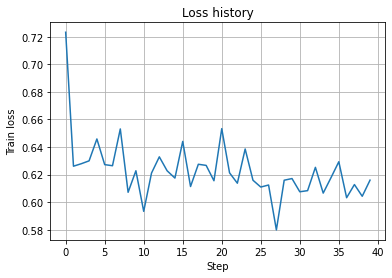

In [50]:
import matplotlib.pyplot as plt
plt.title('Loss history')
plt.grid(True)
plt.ylabel('Train loss')
plt.xlabel('Step')
plt.plot(loss_history)

In [44]:
test_dataset = DataWrapper(x_test)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

In [28]:
model.eval()

for epoch in range(1,epochs+1):
    print(f"Train epoch {epoch}/{epochs}")
    for i, (data, target) in enumerate(test_loader):
        # compute output
        output = model(data)
        break

### Task
Basing on the previous cell add code to infer your model for a particular input text.